In [4]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [5]:
churn_df= pd.read_csv('ChurnData.csv')
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [13]:
churn_df= churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn']= churn_df['churn'].astype('int')
churn_df.dtypes

tenure      float64
age         float64
address     float64
income      float64
ed          float64
employ      float64
equip       float64
callcard    float64
wireless    float64
churn         int32
dtype: object

In [11]:
churn_df['churn'].value_counts()

0    142
1     58
Name: churn, dtype: int64

In [15]:
print(churn_df.shape)
print(churn_df.columns)

(200, 10)
Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')


In [16]:
x= np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless']])
x

array([[11., 33.,  7., ...,  0.,  1.,  1.],
       [33., 33., 12., ...,  0.,  0.,  0.],
       [23., 30.,  9., ...,  0.,  0.,  0.],
       ...,
       [ 6., 32., 10., ...,  0.,  1.,  0.],
       [24., 30.,  0., ...,  0.,  1.,  1.],
       [61., 50., 16., ...,  1.,  1.,  1.]])

In [17]:
y= np.asarray(churn_df['churn'])
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0])

In [18]:
from sklearn import preprocessing
x= preprocessing.StandardScaler().fit(x).transform(x)
x

array([[-1.13518441, -0.62595491, -0.4588971 , ..., -0.85972695,
         0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, ..., -0.85972695,
        -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , ..., -0.85972695,
        -1.54590766, -0.63910148],
       ...,
       [-1.36680743, -0.7026181 , -0.16283445, ..., -0.85972695,
         0.64686916, -0.63910148],
       [-0.53296457, -0.85594447, -1.14970993, ..., -0.85972695,
         0.64686916,  1.56469673],
       [ 1.18104577,  0.67731925,  0.42929083, ...,  1.16316   ,
         0.64686916,  1.56469673]])

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=4)
print('train set: ',x_train.shape, y_train.shape)
print('test set: ', x_test.shape, y_test.shape)

train set:  (160, 9) (160,)
test set:  (40, 9) (40,)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR= LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
yhat= LR.predict(x_test)
yhat

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [24]:
yhat_prob= LR.predict_proba(x_test)
yhat_prob

array([[0.58711718, 0.41288282],
       [0.56650898, 0.43349102],
       [0.5313329 , 0.4686671 ],
       [0.66722528, 0.33277472],
       [0.53481231, 0.46518769],
       [0.59508358, 0.40491642],
       [0.49995014, 0.50004986],
       [0.56532893, 0.43467107],
       [0.39939231, 0.60060769],
       [0.59368426, 0.40631574],
       [0.54844546, 0.45155454],
       [0.58957413, 0.41042587],
       [0.52439771, 0.47560229],
       [0.41344893, 0.58655107],
       [0.68930146, 0.31069854],
       [0.51576247, 0.48423753],
       [0.4969602 , 0.5030398 ],
       [0.46038301, 0.53961699],
       [0.47010467, 0.52989533],
       [0.57170621, 0.42829379],
       [0.50781873, 0.49218127],
       [0.49802608, 0.50197392],
       [0.66938224, 0.33061776],
       [0.49625351, 0.50374649],
       [0.47635919, 0.52364081],
       [0.73040145, 0.26959855],
       [0.45111513, 0.54888487],
       [0.49187403, 0.50812597],
       [0.4927476 , 0.5072524 ],
       [0.73618723, 0.26381277],
       [0.

In [25]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,yhat)

C:\Users\D.R.A KUMARAGE\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.65

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title= 'confusion_matrix', cmap= plt.cm.Blues):
    
    if normalize:
        cm= cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalize Confusion Matrix")
    else:
        print('Confusion Matrix, Without Normalize')
    
    print(cm)
    
    plt.imshow(cm, interpolation= 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation= 45)
    plt.yticks(tick_marks, classes)
    
    fmt= '.2f' if normalize else 'd'
    thresh= cm.max()/2.
    
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True lable')
    plt.xlabel('predicted lable')
    
print(confusion_matrix(y_test, yhat, labels=[1,0]))
    
    

[[ 8  7]
 [ 7 18]]


Confusion Matrix, Without Normalize
[[ 8  7]
 [ 7 18]]


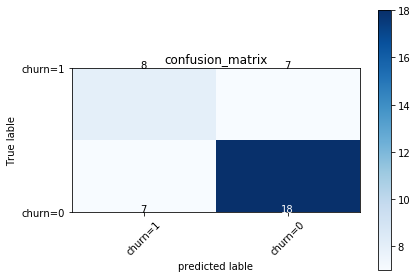

In [37]:
cnf_matrix= confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'], normalize=False, title='confusion_matrix')

In [39]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.53      0.53      0.53        15

    accuracy                           0.65        40
   macro avg       0.63      0.63      0.63        40
weighted avg       0.65      0.65      0.65        40



In [41]:
from sklearn.metrics import log_loss
log_loss(y_test,yhat_prob)

0.6155809757244557

In [47]:
LR2= LogisticRegression(C=0.01, solver='sag').fit(x_train,y_train)
yhat_prob_2= LR2.predict_proba(x_test)
print("Log loss: %.2f" % log_loss(y_test,yhat_prob_2))

Log loss: 0.62
